### Data Analyst Program - Interim Project 

In [1]:
!pip install pypyodbc
import pypyodbc as odbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [2]:
DRIVER_NAME='SQL SERVER'
SERVER_NAME='DESKTOP-TTHH100\SQLEXPRESS'
DATABASE_NAME='AdventureWorks2022'

In [3]:
# connection string to establish connection with AdventureWorks2022 Database
connection_string=f"""
                      DRIVER={{{DRIVER_NAME}}};
                      SERVER={SERVER_NAME};
                      DATABASE={DATABASE_NAME};
                      Trust_Connection=yes; 
                    """
# creating connection object
conn=odbc.connect(connection_string)

# Create a cursor object
cursor=conn.cursor()

#### 1. What are the regional sales in the best performing country?

In [4]:
# query to retrieve data from table
# grouping the total number of sales by CountryRegionCode to understand the best performing country of alL
sql_query = '''SELECT 
                T.CountryRegionCode, 
                T.Name, Count(OH.SalesOrderID) as Number_Of_Sales
                FROM Sales.SalesOrderHeader OH
                INNER JOIN Sales.SalesTerritory T
                ON OH.TerritoryID = T.TerritoryID
                GROUP BY T.CountryRegionCode, T.Name
            '''

# execute the query
cursor.execute(sql_query)

# fetch all the rows returned by the query
rows = cursor.fetchall()

# create a DataFrame from the fetched data
df = pd.DataFrame(rows, columns=[column[0] for column in cursor.description])

# display the DataFrame
print(df.head())

  countryregioncode       name  number_of_sales
0                AU  Australia             6843
1                US    Central              385
2                CA     Canada             4067
3                FR     France             2672
4                US  Northwest             4594


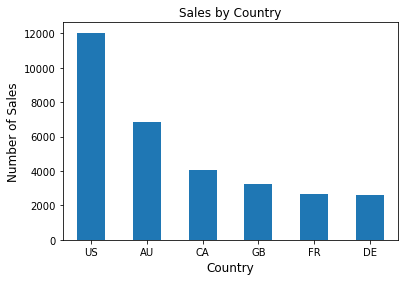

In [5]:
# visualization of 'regional sales in the best performing country' using bar chart
Country_group = df.groupby(by= 'countryregioncode')
sales_by_country=Country_group.sum()['number_of_sales']
sales_by_country_sorted = sales_by_country.sort_values(ascending=False)
sales_by_country_sorted.plot.bar(title="Sales by Country")

# Customize the x-axis and y-axis labels
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0)

# Display the plot
plt.show()


Analysis : US is the country with most number of sales and high performing of all countries.

In [6]:
# filtering the dataframe for only US records by Region
USrecords= df[df['countryregioncode'] == 'US']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Southwest'),
  Text(1, 0, 'Northwest'),
  Text(2, 0, 'Southeast'),
  Text(3, 0, 'Central'),
  Text(4, 0, 'Northeast')])

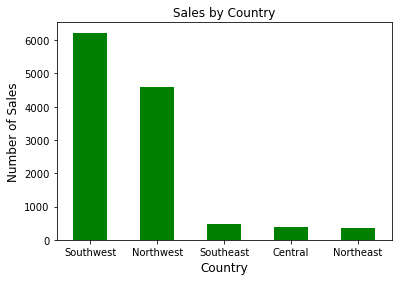

In [7]:
region_group = USrecords.groupby(by= 'name')
sales_by_region=region_group.sum()['number_of_sales']
sales_by_region_sorted = sales_by_region.sort_values(ascending=False)
sales_by_region_sorted.plot.bar(title="Sales by Country", color= 'green')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0)

Analysis : Southwest has the highest number of sales followed by Northwest.

#### 2. What is the relationship between annual leave taken and bonus?

In [8]:
person_query = '''SELECT 
                    SP.BusinessEntityID
                    , P.PersonType
                    , SP.Bonus
                    , VE.JobTitle
                    , E.SalariedFlag
                    , E.VacationHours as Annual_Leave_Balance
                    , E.SickLeaveHours as Sick_Leave
                    FROM SALES.SALESPERSON SP
                    INNER JOIN HumanResources.Employee E 
                    ON SP.BusinessEntityID = E.BusinessEntityID
                    INNER JOIN HumanResources.vEmployee VE 
                    ON SP.BusinessEntityID = VE.BusinessEntityID
                    INNER JOIN [Person].[Person] P
                    ON P.[BusinessEntityID] = E.[BusinessEntityID]
                '''

# execute the query
cursor.execute(person_query)

# fetch all the rows returned by the query
rows = cursor.fetchall()

# create a DataFrame from the fetched data
BonusvsAL = pd.DataFrame(rows, columns=[column[0] for column in cursor.description])

# Display the DataFrame
BonusvsAL.head()

,businessentityid,persontype,bonus,jobtitle,salariedflag,annual_leave_balance,sick_leave
0,274,SP,0.0000,North American Sales Manager,True,14,27
1,275,SP,4100.0000,Sales Representative,True,38,39
2,276,SP,2000.0000,Sales Representative,True,27,33
3,277,SP,2500.0000,Sales Representative,True,24,32
4,278,SP,500.0000,Sales Representative,True,33,36


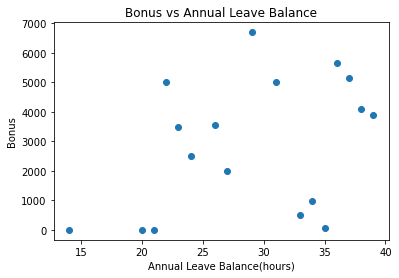

In [9]:
# visualization of 'relationship between annual leave taken and bonus' using scatter chart
plt.scatter(BonusvsAL['annual_leave_balance'], BonusvsAL['bonus'])
plt.title('Bonus vs Annual Leave Balance')
plt.xlabel('Annual Leave Balance(hours)')
plt.ylabel('Bonus')
plt.show()

 Analysis:
 +In the plot above, the x axis is showing the 'Annual Leave Balance' and y axis is showing the 'Bonus Earned'. 
 +Annual Leave taken would result in lower Annual leave balance. 
 +Although we do notice that staff with less annual leave balance(indicating staff have used more annual leave) have a lesser     bonus earned. 
 +We also see cases (as the ones marked in the red ) where staff have not used their annual leave and yet did not get a good       bonus thereby indicating that annual leave may not be the strong factor in earning a good bonus.

#### 3. What is the relationship between Country and Revenue?

In [10]:
person_query = '''
                SELECT 
                SD.BusinessEntityID, 
                SD.Name,
                SD.YearOpened,
                SA.CountryRegionName AS Country,
                SD.AnnualRevenue
                FROM Sales.vStoreWithDemographics SD
                INNER JOIN Sales.vStoreWithAddresses SA 
                ON SD.BusinessEntityID = SA.BusinessEntityID
            '''

# execute the query
cursor.execute(person_query)

# fetch all the rows returned by the query
rows = cursor.fetchall()

# create a DataFrame from the fetched data
Countrydf = pd.DataFrame(rows, columns=[column[0] for column in cursor.description])

# Display the DataFrame
Countrydf.head()

,businessentityid,name,yearopened,country,annualrevenue
0,624,Budget Toy Store,1998,Australia,300000.0000
1,1342,Global Sports Outlet,1993,Australia,300000.0000
2,784,Online Bike Catalog,1975,Australia,300000.0000
3,796,Rich Department Store,1974,Australia,300000.0000
4,1314,Volume Bike Sellers,1999,Australia,300000.0000


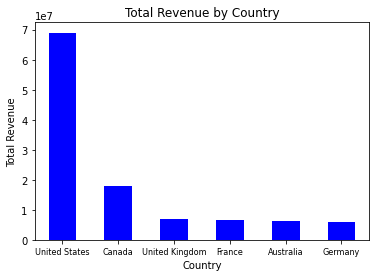

In [11]:
# visualization of 'relationship between Country and Revenue' using bar chart
# Convert 'annualrevenue' column to numeric type
Countrydf['annualrevenue'] = pd.to_numeric(Countrydf['annualrevenue'])

# Group by country and calculate the sum of 'annualrevenue'
revenue = Countrydf.groupby('country')['annualrevenue'].sum()

revenue_sorted = revenue.sort_values(ascending=False)
# Create a bar plot of the sum of revenue by country
revenue_sorted.plot(kind='bar', title='Total Revenue by Country', color = "blue")

# Set labels and show plot
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0,fontsize=8)

plt.show()

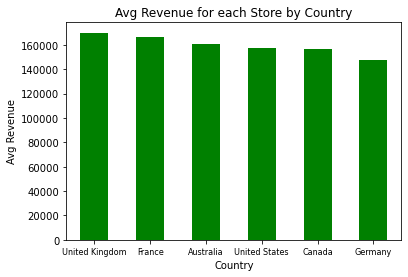

In [12]:
# Convert 'annualrevenue' column to numeric type
Countrydf['annualrevenue'] = pd.to_numeric(Countrydf['annualrevenue'])

# Group by 'trading_duration_range' and calculate the sum of 'annualrevenue'
avg_revenue = Countrydf.groupby('country')['annualrevenue'].mean()

avg_revenue_sorted = avg_revenue.sort_values(ascending=False)
# Create a bar plot of the sum of revenue by trading duration range
avg_revenue_sorted.plot(kind='bar', title='Avg Revenue for each Store by Country', color = "green")

# Set labels and show plot
plt.xlabel('Country')
plt.ylabel('Avg Revenue')
plt.xticks(rotation=0,fontsize=8)
plt.show()

Analysis: 
The total revenue of United States is much higher compared to other countries. This is due to a higher number of stores in the US compared to other countries. However when we look at the average revenue per store by country, UK, France and Australia have a higher average revenue compared to United States. 

#### 4. What is the relationship between Sick Leave and Job Title?

In [13]:
# We are using the above query to analyze sick leave and job title

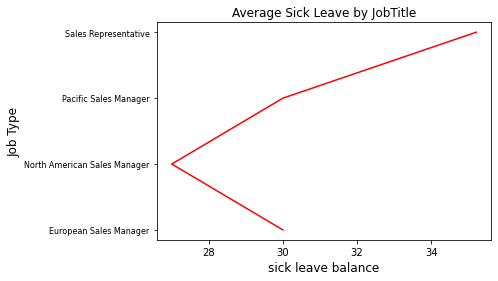

In [14]:
# visualization of 'No of Employees with their Job Title' using bar chart
JobTitleGroup = BonusvsAL.groupby(by= 'jobtitle')
# visualization of 'relationship between sick leave and job title'
job_title=JobTitleGroup.mean()['sick_leave']
plt.plot( job_title.values,job_title.index, color='red')

plt.xlabel('sick leave balance', fontsize=12)
plt.ylabel('Job Type', fontsize=12)
plt.yticks(fontsize=8)
plt.title("Average Sick Leave by JobTitle")
plt.show()

Analysis: We have only 1 record for each of the Sales managers and 14 Sales representatives. Sales Representative have higher average leave balance compared to Country/Region Sales Managers indicating Sales Representatives use less sick leaves compared to other job types.

### 5. What is the relationship between store trading duration and revenue?

In [15]:
# What is the relationship between store trading duration and revenue?
query= '''  SELECT BusinessEntityID, 
            Name,
            YearOpened,
            Year(GETDATE()) AS Current_Year, 
            Year(GETDATE()) - YearOpened AS Trading_Duration, 
            AnnualRevenue,
            CASE when (Year(GETDATE()) - YearOpened ) <= 25 then '0 - 25'
            when (Year(GETDATE()) - YearOpened ) between 25 and  35 then  '25 - 35'
            when(Year(GETDATE()) - YearOpened ) between 35 and  45 then  '35 - 45'
            when (Year(GETDATE()) - YearOpened ) between 45 and  55 then  '45 - 55'
            else '55+' END as Trading_Duration_Range
            FROM 
            Sales.vStoreWithDemographics
        '''

# Execute the query and fetch the results
cursor.execute(query)
rows=cursor.fetchall()

# create a DataFrame from the fetched data
store_df = pd.DataFrame(rows, columns=[column[0] for column in cursor.description])

# Display the DataFrame
store_df.head()

,businessentityid,name,yearopened,current_year,trading_duration,annualrevenue,trading_duration_range
0,292,Next-Door Bike Store,1996,2023,27,80000.0000,25 - 35
1,294,Professional Sales and Service,1991,2023,32,80000.0000,25 - 35
2,296,Riders Company,1999,2023,24,80000.0000,0 - 25
3,298,The Bike Mechanics,1994,2023,29,80000.0000,25 - 35
4,300,Nationwide Supply,1987,2023,36,80000.0000,35 - 45


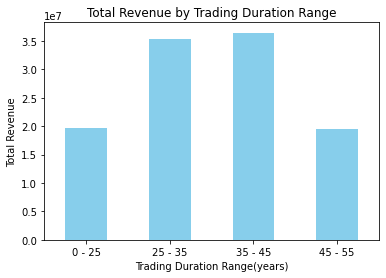

In [16]:
# visualization of 'relationship between store trading duration and revenue'
# Convert 'annualrevenue' column to numeric type
store_df['annualrevenue'] = pd.to_numeric(store_df['annualrevenue'])

# Group by 'trading_duration_range' and calculate the sum of 'annualrevenue'
revenue = store_df.groupby('trading_duration_range')['annualrevenue'].sum()

# Create a bar plot of the sum of revenue by trading duration range
revenue.plot(kind='bar', title='Total Revenue by Trading Duration Range', color= 'Skyblue')

# Set labels and show plot
plt.xlabel('Trading Duration Range(years)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

Analysis:
More revenue is generated from stores where trading duration is between 35 and 45 years. This is probably due to more number of stores fall in this range

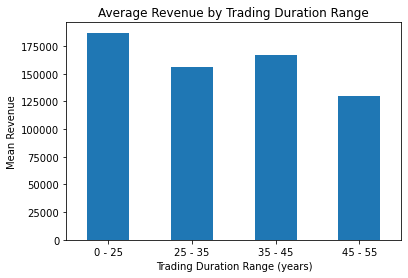

In [17]:
# Group by 'trading_duration_range' and calculate the sum of 'annualrevenue'
Mean_revenue = store_df.groupby('trading_duration_range')['annualrevenue'].mean()

# Create a bar plot of the sum of revenue by trading duration range
Mean_revenue.plot(kind='bar', title='Average Revenue by Trading Duration Range')

# Set labels and show plot
plt.xlabel('Trading Duration Range (years)')
plt.ylabel('Mean Revenue')
plt.xticks(rotation=0)
plt.show()

Analysis:
The above plot shows that stores with a trading duration of 0 to 25 years have a higher average annual revenue, and the older stores with trading duration of 45 to 55 years have the lowest annual revenue.

#### 6. What is the relationship between the size of the stores, number of employees and revenue?

In [18]:
# Execute a query to retrieve data
query='''   SELECT BusinessEntityID, 
            Name, 
            SquareFeet, 
            CASE when SquareFeet <= 20000 then '0-20K'
            when SquareFeet between 20000 and  40000 then  '20K-40K'
            when SquareFeet between 40000 and  60000 then  '40K-60K'
            when SquareFeet between 60000 and  80000 then  '60K-80K'
            else '80K+' END as Store_Size_Range,
            NumberEmployees, 
            AnnualRevenue
            FROM Sales.vStoreWithDemographics
            order by SquareFeet desc
        '''

# Execute the query and fetch the results
cursor.execute(query)
rows=cursor.fetchall()

store_area_df=pd.DataFrame(rows,columns=[column[0] for column in cursor.description])
store_area_df.head()

,businessentityid,name,squarefeet,store_size_range,numberemployees,annualrevenue
0,536,Nonskid Tire Company,80000,60K-80K,100,300000.0000
1,698,Bike Rims Company,80000,60K-80K,97,300000.0000
2,778,One-Piece Handle Bars,80000,60K-80K,97,300000.0000
3,958,Big-Time Bike Store,80000,60K-80K,96,300000.0000
4,1310,Unified Sports Company,80000,60K-80K,98,300000.0000


C:\Users\Admin\AppData\Local\Temp\ipykernel_6576\4007988502.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_revenue.index, rotation=0)


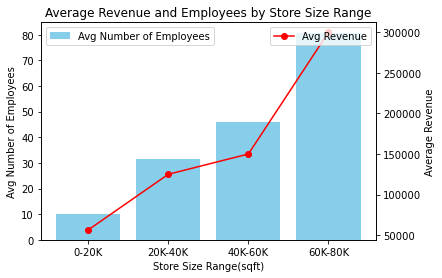

In [19]:
# visualization of 'relationship between the size of the stores, number of employees and revenue'
avg_revenue = store_area_df.groupby('store_size_range')['annualrevenue'].mean()
total_employees = store_area_df.groupby('store_size_range')['numberemployees'].mean()

# Create a figure and axis object
fig, ax1 = plt.subplots()

# Create the bar plot for total number of employees
ax1.bar(avg_revenue.index, total_employees, color='skyblue')
ax1.set_xlabel('Store Size Range(sqft)')
ax1.set_ylabel('Avg Number of Employees')
ax1.set_title('Average Revenue and Employees by Store Size Range')

# Create the line plot for average revenue
ax2 = ax1.twinx()
ax2.plot(avg_revenue.index, avg_revenue, color='red', marker='o')
ax2.set_ylabel('Average Revenue')

# Set tick labels for x-axis
ax1.set_xticklabels(avg_revenue.index, rotation=0)

# Add legends
ax1.legend(['Avg Number of Employees'], loc='upper left')
ax2.legend(['Avg Revenue'], loc='upper right')

plt.show()

Analysis:
From the above graph we noticed that as expected more number employees are placed in the larger stores with area over 60000sqft.

Also the stores with larger area also generate the higher average revenue. 